IMPORTING THE NECESSARY LIBRARIES FOR ALL THE QUESTIONS

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Model used for content on weekend
from sklearn.ensemble import RandomForestRegressor # Model used for content on Weekdays
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Used in answer question 5

In [42]:
#LOADING THE DATA INTO JUPYTER NOTEBOOK FOR ANALYSIS
csv_file_path=r"C:\Users\pcric\Desktop\DATA PROJECTS\MID TERM EXAMS\OnlineNewsPopularity.csv"

data_fram=pd.read_csv(csv_file_path)

In [21]:
#Display the first few rows of the DataFrame
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,4.680365,5,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,4.913725,4,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,4.393365,6,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,4.404896,7,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,4.682836,7,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# QUESTION 1

The target variable is ‘shares,’ which refers to the number of shares. Do correlation analysis with it and other variables in the dataset to find the most relevant (related) factor (make sure this variable is continuous). Build a regression model using these variables to predict 'shares'. Report the model.

In [9]:
#Calculate the correlation between 'Shares' and 'abs_title_sentiment_polarity'
correlation=df['shares'].corr(df['abs_title_sentiment_polarity'])

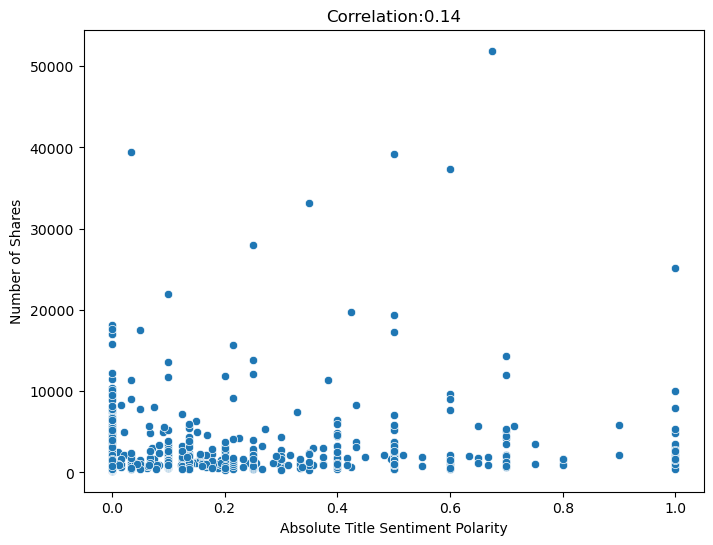

In [22]:
#Creating a scatter plot to visualize the relationship
plt.figure(figsize=(8,6))
sns.scatterplot(x='abs_title_sentiment_polarity', y='shares', data=df)
plt.title(f"Correlation:{correlation:.2f}")
plt.xlabel("Absolute Title Sentiment Polarity")
plt.ylabel("Number of Shares")
plt.grid=(True)
plt.show()

In [24]:
#Split the data into training and testing sets
X=df[['abs_title_sentiment_polarity']] #Features
y=df['shares'] # target variable
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
#Building the Linear Regression Model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
#Make predictions on the test set
y_pred=model.predict(X_test)

In [27]:
#Report the model
print(f"Linear Regression Model")
print(f"Coefficient(slope): {model.coef_[0]:.2f}")
print(f"Intercept:{model.intercept_:.2f}")
print(f"Mean Squared Error(MSE):{mse:.2f}")
print(f"R-squared (R2):{r2:.2f}")

Linear Regression Model
Coefficient(slope): 3117.31
Intercept:2135.82
Mean Squared Error(MSE):6041637.33
R-squared (R2):-0.55


# QUESTION 2 USING LINEAR REGRESSION MODEL

Make a subset of online news that was published on weekends. Do correlation analysis with it and other variables in the dataset to find the two most related factors, and build a regression model using these variables to predict 'shares'. Report the model

In [48]:
# Step 1: Create a weekend subset
weekend_data = data_frame[data_frame['is_weekend'] == 1]

# Step 2: Correlation analysis
correlation_matrix = weekend_data.corr()

#Select top correlated features
shares_correlations = correlation_matrix['shares'].sort_values(ascending=False)
top_two_related_features = shares_correlations[1:3].index.tolist()


# Step 3: Build a regression model
X = weekend_data[top_two_related_features]
y = weekend_data['shares']

#Spliting the data into trainig and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Reporting
#Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Regression Model Summary:")
print(f"Features used: {top_two_related_features}")
print(shares_correlations[1:3])

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Report the predicted shares
predicted_shares = model.predict(X_test)
print("\nPredicted shares for the test set:")
print(predicted_shares)


Regression Model Summary:
Features used: ['title_sentiment_polarity', 'abs_title_sentiment_polarity']
title_sentiment_polarity        0.263968
abs_title_sentiment_polarity    0.241728
Name: shares, dtype: float64
Mean Squared Error: 19567989.45
R-squared: -0.36

Predicted shares for the test set:
[3166.03413251 3166.03413251 3166.03413251 3166.03413251 3166.03413251
 3166.03413251 3166.03413251 6545.94598624 6545.94598624 3842.01650325
 5001.9407979  6545.94598624 3166.03413251 3166.03413251 3166.03413251
 1010.12594963 6545.94598624]


# QUESTION 3 USING RANDOM FOREST REGRESSOR MODEL

Make a subset of online news that was published on weekdays. Do correlation analysis with it and other variables in the dataset to find the two most related factors, and build a regression model using these variables to predict 'shares'.  Report the model

In [47]:
# Step 1: Create a weekday subset
weekday_data = data_frame[data_frame['is_weekend'] == 0]

# Step 2: Correlation analysis
correlation_matrix = weekday_data.corr()

# Select top correlated features (excluding shares)
shares_correlations = correlation_matrix['shares'].sort_values(ascending=False)
top_two_related_features = shares_correlations[1:3].index.tolist()

# Step 3: Build a Random Forest Regressor model
X = weekday_data[top_two_related_features]
y = weekday_data['shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Prediction for 'Shares'
y_pred = model.predict(X_test)

# Step 5: Reporting
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Model Summary:")
print(f"Features used: {top_two_related_features}")
print(shares_correlations[1:3])
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 6: Predicted shares for the test set
print("\nPredicted shares for the test set:")
print(y_pred)


Random Forest Regressor Model Summary:
Features used: ['abs_title_sentiment_polarity', 'title_subjectivity']
abs_title_sentiment_polarity    0.112415
title_subjectivity              0.103850
Name: shares, dtype: float64
Mean Squared Error: 6041637.33
R-squared: -0.55

Predicted shares for the test set:
[ 1137.13266667  1279.24444921  2261.35        1196.41608156
  8880.76142857  1946.64584004  1946.64584004  1946.64584004
  3179.1635      1946.64584004  1574.57054545  1946.64584004
  1295.42371952  1574.57054545  1487.22452381  5492.57474711
  3790.73619048  3854.3187619   3739.6087809   1946.64584004
  1946.64584004  1946.64584004  2481.63720779  1946.64584004
  1946.64584004  3690.12462085  1924.03820874  1907.78725924
  3477.7028254    892.98114286   892.98114286  2520.92357143
  1946.64584004  1946.64584004  1946.64584004  1946.64584004
  1946.64584004  1946.64584004  1946.64584004  2602.3805268
  1946.64584004  1946.64584004  1946.64584004  1946.64584004
  2626.63238095  1946.6458

# QUESTION 5 DIVIDED DATASET WITH 2D PLOT WITH CLUSTER MARKS

Divide the dataset into two clusters, one having less than 1400 shares, and the other having equal to or greater than 1400 shares. Extract the two features you have from the first question, and show a 2D plot with clusters marked

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


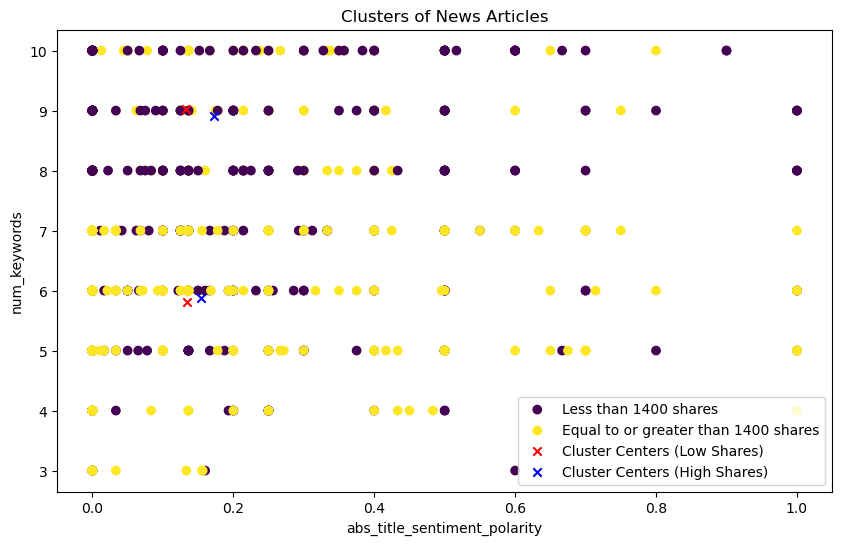

In [38]:
# Load the dataset
newsdata = newsdata = pd.read_csv(csv_file_path)

# Create subsets based on the number of shares
newsdata_low = newsdata[newsdata['shares'] < 1400]
newsdata_high = newsdata[newsdata['shares'] >= 1400]

# Extract the two features used in the regression problem
feature1 = 'abs_title_sentiment_polarity'
feature2 = 'num_keywords'

# Extract features from both subsets
X_low = newsdata_low[[feature1, feature2]]
X_high = newsdata_high[[feature1, feature2]]

# Perform K-means clustering
kmeans_low = KMeans(n_clusters=2, random_state=42)
kmeans_high = KMeans(n_clusters=2, random_state=42)
kmeans_low.fit(X_low)
kmeans_high.fit(X_high)

# Plot the clusters on a 2D plot
plt.figure(figsize=(10, 6))
plt.scatter(X_low[feature1], X_low[feature2], c=kmeans_low.labels_, cmap='viridis', label='Less than 1400 shares')
plt.scatter(X_high[feature1], X_high[feature2], c=kmeans_high.labels_ + 2, cmap='viridis', label='Equal to or greater than 1400 shares')
plt.scatter(kmeans_low.cluster_centers_[:, 0], kmeans_low.cluster_centers_[:, 1], marker='x', color='red', label='Cluster Centers (Low Shares)')
plt.scatter(kmeans_high.cluster_centers_[:, 0], kmeans_high.cluster_centers_[:, 1], marker='x', color='blue', label='Cluster Centers (High Shares)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Clusters of News Articles')
plt.legend()
plt.show()
